## BANK MARKETING
Os dados estão relacionados a campanhas de marketing direto de uma instituição bancária portuguesa, que realizou as campanhas com o objetivo levar clientes a assinar um termo de depósito. As campanhas de marketing foram baseadas em chamadas telefônicas.
<br>Mais detalhes podem ser encontrados na fonte dos dados: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing
<br>
### Colunas
Dados do cliente:
<ul> 
    <li><b>age</b>: Idade (Númerico)</li> 
    <li><b>job</b>: Tipo de emprego (Categoria: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services")</li> 
    <li><b>marital</b>: Estado Civil (Categoria: "married","divorced","single"; Nota: "divorced" significa divociado ou viúvo)</li> 
    <li><b>education</b>: Escolaridade (Categoria: "unknown","secondary","primary","tertiary")</li>
    <li><b>default</b>: Tem crédito em default? (Binário: "yes, "no")</li>
    <li><b>balance</b>: Saldo médio anual, em euros (Numérico)</li>
    <li><b>housing</b>: Tem empréstimo habitacional? (Binário: "yes", "no")</li>
    <li><b>loan</b>: Tem empréstimo pessoal? (Binário: "yes", "no")</li>
</ul>
Dados relacionados ao último contato da campanha atual:
<ul>
    <li><b>contact</b>: Tipo de comunicação de contato (Categoria: "unknown","telephone","cellular")</li>
    <li><b>day</b>: Dia do último contato do mês (Numérico)</li>
    <li><b>month</b>: Mês do último contato do ano (Categória: "jan", "feb", "mar", ..., "nov", "dec")</li>
    <li><b>duration</b>: Duração do último contato, em segundos (Numérico)</li>
</ul>
Outras colunas:
<ul>
    <li><b>campaign</b>: Número de contatos realizados durante esta campanha e para o cliente (Numérico, inclui o último contato)</li>
    <li><b>pdays</b>: Número de dias que passaram depois que o cliente foi contatado pela última vez durante alguma campanha anterior (Numérico, -1 significa que o cliente não foi contatado anteriormente)</li>
    <li><b>previous</b>: Número de contatos realizados antes desta campanha e para este cliente (Numérico)</li>
    <li><b>poutcome</b>: Resultado da campanha de marketing anterior (Categória: "unknown","other","failure","success")</li>
</ul>
Resultado da campanha:
<ul>
    <li><b>y</b>: O cliente assinou um depósito a prazo? (Binário: "yes", "no")</li>
</ul>

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filename = 'bank-full.csv'
df = pd.read_csv(filename, encoding='iso-8859-1', delimiter =';')

In [3]:
df.shape

(45211, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
35714,38,entrepreneur,married,primary,no,350,yes,no,cellular,8,may,75,1,-1,0,unknown,no
41949,78,retired,divorced,primary,no,229,no,no,telephone,22,oct,97,1,-1,0,unknown,yes
18910,46,retired,divorced,tertiary,no,-48,no,no,cellular,4,aug,20,4,-1,0,unknown,no
1833,27,blue-collar,married,tertiary,no,350,no,no,unknown,9,may,24,1,-1,0,unknown,no
25411,52,management,married,tertiary,no,1295,yes,no,cellular,18,nov,121,1,123,1,other,no
33064,38,management,single,tertiary,no,667,yes,no,cellular,17,apr,479,2,-1,0,unknown,no
31290,37,unemployed,single,tertiary,no,1316,yes,no,cellular,10,mar,350,2,112,3,failure,yes
45004,29,self-employed,single,tertiary,no,1579,no,no,cellular,13,oct,190,1,92,5,success,yes
4361,47,blue-collar,married,unknown,no,-345,yes,no,unknown,19,may,18,14,-1,0,unknown,no
27708,42,services,single,unknown,no,410,no,no,cellular,21,nov,34,2,-1,0,unknown,no


## Profissões

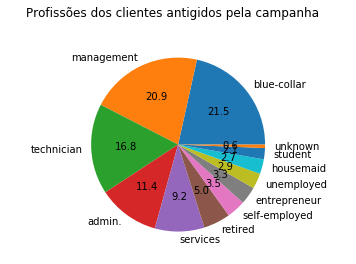

In [6]:
plt.axis('equal')
row = df['job'].value_counts()
legendas = row.index
plt.pie(row, autopct="%.1f", labels=legendas)
plt.suptitle("Profissões dos clientes antigidos pela campanha")

plt.show()

## Escolaridade

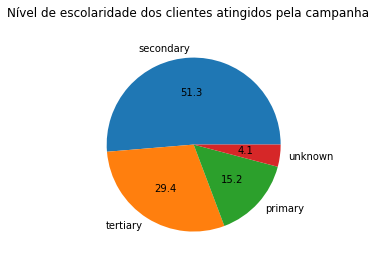

In [7]:
plt.axis('equal')
row = df['education'].value_counts()
legendas = row.index
plt.pie(row, autopct="%.1f", labels=legendas)
plt.suptitle("Nível de escolaridade dos clientes atingidos pela campanha")
plt.show()

## Estado Civil

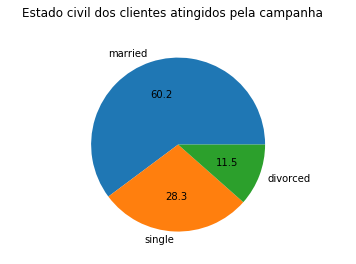

In [8]:
plt.axis('equal')
row = df['marital'].value_counts()
legendas = row.index
plt.pie(row, autopct="%.1f", labels=legendas)
plt.suptitle("Estado civil dos clientes atingidos pela campanha")
plt.show()

## Quantidade de clientes que aderiram a atual campanha

In [9]:
df[df["y"]=="yes"].count()["y"]

5289

In [10]:
(df[df["y"]=="yes"].count()["y"])/(df['y'].count())

0.11698480458295547

Apenas 11,7% dos clientes contatados aderiram a campanha.

## A profissão que tem mais tendência a fazer um empréstimo:
#### Quantidade de clientes que aderiram por profissão:

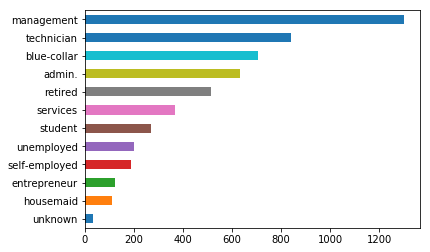

In [11]:
df.query('y == "yes"')['job'].value_counts(ascending=True).plot(kind='barh')

#### Percentual da relação quantidade que aderiram x total de clientes contatados, por profissão:

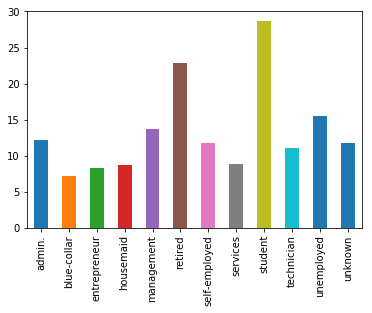

In [12]:
((df.query('y == "yes"')['job'].value_counts()/df['job'].value_counts())*100).plot(kind='bar')

Com base na quantidade que aderiram sob o total que foram contatados, podemos dizer que os estudantes são os que mais tem tendência a assinar um termo de depósito.

## Fazendo uma relação entre o número de contatos e adesões a campanha, percentual de sucesso da mesma:

In [13]:
#(df[df["y"]=="yes"].count()["y"])
#(df[df["y"]=="yes"].count()["y"])/df["campaign"].sum()
(df[df["y"]=="yes"].count()["y"])/df["campaign"].sum()

0.042326899068472104

## Baseado nos resultados de adesão da campanha, o número médio de ligações ideais para otimizar a adesão:

#### Número médio:

In [14]:
df[df["y"]=="yes"].mean()["campaign"]

2.1410474569861977